<a href="https://colab.research.google.com/github/Bigs97/python_proj/blob/main/Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Good Morning!")

Good Morning!


In [6]:
from bs4 import BeautifulSoup
import requests

In [ ]:
html_content = ''
for i in range(1,25):
    url = f'https://www.scrapethissite.com/pages/forms/?page_num={i}'
    response = requests.get(url)
    if response.status_code == 200:
        print(f'{i} page success')
        html_content += response.text
    else:
        print(f'{i} page response not success, status code = {response.status_code}')

print(html_content)
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
soup

In [ ]:
data = []
tags = soup.find_all('tr')
for tag in tags:
    x = tag.text
    data.append(x)
data

In [ ]:
datas = []
for i in data:
    datas.append(i.split('\n')[2:-2])
datas

In [ ]:
for element in datas:
    for count, i in enumerate(element):
        print(count,i)

In [ ]:
for element in datas:
    for num in range(len(element)):
        element[num] = element[num].strip()
datas

In [13]:
for element in datas[1:]:
    if len(element) == 24:
        element.insert(12,'NaN')

In [ ]:
datas

In [ ]:
datas = [[i for i in sublist if i !=''] for sublist in datas]
datas

In [ ]:
datas = [sublist for sublist in datas if sublist != ['Team Name',
  'Year',
  'Wins',
  'Losses',
  'OT Losses',
  'Win %',
  'Goals For (GF)',
  'Goals Against (GA)',
  '+ / -']]
datas

In [17]:
import csv
csv_file = 'hockey_teams.csv'
headers = ['Team Name',
  'Year',
  'Wins',
  'Losses',
  'OT Losses',
  'Win %',
  'Goals For (GF)',
  'Goals Against (GA)',
  '+ / -']
with open(csv_file,'w',encoding = 'utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    writer.writerows(datas)

In [18]:
import pandas as pd
df = pd.read_csv('hockey_teams.csv')
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


In [19]:
cleaned_data = []
with open(csv_file,'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        cleaned_data.append((row['Team Name'],row['Wins'],row['Losses']))

sorted_cleaned_data = sorted(cleaned_data, key = lambda x: int(x[1]), reverse = True)

In [20]:
sorted_cleaned_data

[('Detroit Red Wings', '62', '13'),
 ('Detroit Red Wings', '58', '16'),
 ('Pittsburgh Penguins', '56', '21'),
 ('Detroit Red Wings', '54', '21'),
 ('Washington Capitals', '54', '15'),
 ('Vancouver Canucks', '54', '19'),
 ('Dallas Stars', '53', '23'),
 ('Buffalo Sabres', '53', '22'),
 ('Boston Bruins', '53', '19'),
 ('San Jose Sharks', '53', '18'),
 ('New York Rangers', '52', '24'),
 ('Colorado Avalanche', '52', '16'),
 ('Ottawa Senators', '52', '21'),
 ('Buffalo Sabres', '52', '24'),
 ('Carolina Hurricanes', '52', '22'),
 ('Ottawa Senators', '52', '21'),
 ('Chicago Blackhawks', '52', '22'),
 ('Boston Bruins', '51', '26'),
 ('Dallas Stars', '51', '19'),
 ('St. Louis Blues', '51', '19'),
 ('Detroit Red Wings', '51', '17'),
 ('Nashville Predators', '51', '23'),
 ('San Jose Sharks', '51', '26'),
 ('Detroit Red Wings', '51', '21'),
 ('New Jersey Devils', '51', '27'),
 ('San Jose Sharks', '51', '20'),
 ('New York Rangers', '51', '24'),
 ('Pittsburgh Penguins', '51', '25'),
 ('Vancouver Canuc

In [21]:
import matplotlib.pyplot as plt
team = [count[0] for count in sorted_cleaned_data]
wins = [count[1] for count in sorted_cleaned_data]
losses = [count[2] for count in sorted_cleaned_data]

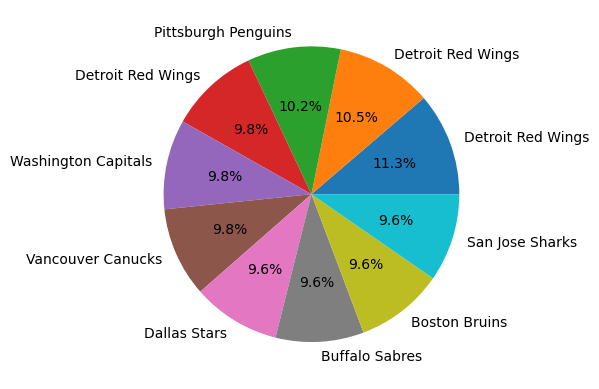

In [22]:
plt.pie(wins[:10], labels = team[:10], autopct = '%1.1f%%')
plt.show()

In [23]:
loss_sorted_data = sorted_cleaned_data = sorted(cleaned_data, key = lambda x: int(x[2]), reverse = True)
loss_sorted_data

[('San Jose Sharks', '11', '71'),
 ('Ottawa Senators', '10', '70'),
 ('Ottawa Senators', '14', '61'),
 ('Ottawa Senators', '18', '59'),
 ('San Jose Sharks', '17', '58'),
 ('Atlanta Thrashers', '14', '57'),
 ('San Jose Sharks', '20', '55'),
 ('Tampa Bay Lightning', '17', '55'),
 ('Tampa Bay Lightning', '23', '54'),
 ('Tampa Bay Lightning', '19', '54'),
 ('Hartford Whalers', '26', '52'),
 ('Winnipeg Jets', '24', '51'),
 ('New York Islanders', '21', '51'),
 ('Quebec Nordiques', '16', '50'),
 ('Edmonton Oilers', '26', '50'),
 ('New York Islanders', '22', '50'),
 ('Quebec Nordiques', '20', '48'),
 ('Hartford Whalers', '27', '48'),
 ('New York Islanders', '24', '48'),
 ('New York Islanders', '24', '48'),
 ('Philadelphia Flyers', '22', '48'),
 ('Boston Bruins', '26', '47'),
 ('San Jose Sharks', '27', '47'),
 ('Nashville Predators', '28', '47'),
 ('Vancouver Canucks', '23', '47'),
 ('Tampa Bay Lightning', '19', '47'),
 ('Tampa Bay Lightning', '24', '47'),
 ('Atlanta Thrashers', '19', '47'),
 (

In [24]:
losses = [count[2] for count in loss_sorted_data]
teams = [count[0] for count in loss_sorted_data]

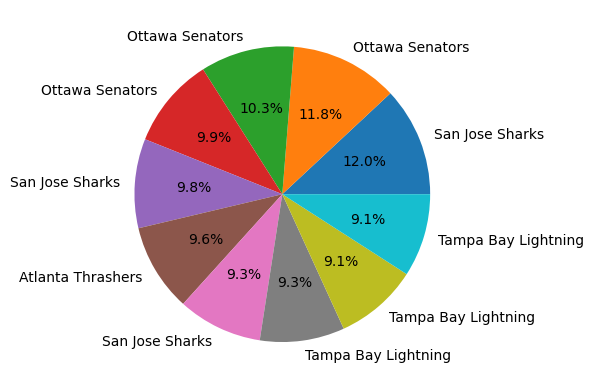

In [25]:
plt.pie(losses[:10], labels = teams[:10], autopct = '%1.1f%%')
plt.show()